# Capstone Project - The Battle of the Neighborhoods (Cities) 
## Applied Data Science Capstone by IBM/Coursera

### Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results & Discussion](#results)
* [Conclusion](#conclusion)

### Introduction : Business Problem <a name="introduction"></a>

In this project, we will look into the Top 50 most beautiful cities in the world and would try to cluster them into mutually exclusive groups. 

We will use Foursquare location data to explore the cities' surroundings and **cluster cities basis venues in their vicinity.** 

We will then find out the **most commonly occuring trait that would certainly define that particular cluster of cities** based on the top 10 most commonly visited venues in that cluster of cities.

**Business Utility** : This analyses would be of use to **travel enthusiasts and/ or travel magazines/ online portals which frequently publish the list of most beautiful cities that one must visit at least once in a lifetime. The added advantage here is that, one would be able to group cities into buckets and can make travel itenaries accordingly as per one's choice**.


### Data <a name="data"></a>

I have taken the list of _**"THE WORLD'S 50 MOST BEAUTIFUL CITIES**_ from the website https://www.flightnetwork.com/blog/worlds-most-beautiful-cities/

The website contains a numbered list of the top 50 cities globally. As such, **BeautifulSoup package** has been used to scrape the website and get the top 50 cities in a tabular format.

In order to find out the geographical coordinates of these cities, the **geopy** package was used. 

Next, **Foursquare** was used to explore the vicinity of these top 50 cities. A sufficient radius of 20 km from the city centre was chosen and limit of 1000 results per city was applied.

## CODE

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
from bs4 import BeautifulSoup

#### Scraping the website

In [3]:
URL = "https://www.flightnetwork.com/blog/worlds-most-beautiful-cities/"
r = requests.get(URL) 
print(r.content) 

b'<!DOCTYPE html><html lang="en-US" class="no-js"><head><meta charset="UTF-8"><meta id="viewport" name="viewport" content="user-scalable=no, width=device-width, initial-scale=1" /><link rel="profile" href="http://gmpg.org/xfn/11"><link rel="pingback" href="https://www.flightnetwork.com/blog/xmlrpc.php"> <!--[if lt IE 9]> <script src="https://www.flightnetwork.com/blog/wp-content/themes/letsroll2015/js/html5.js"></script> <![endif]--> <script src="//code.jquery.com/jquery-1.11.0.min.js" type="text/javascript"></script> <link rel="stylesheet" type="text/css" href="https://www.flightnetwork.com/blog/wp-content/themes/letsroll2015/css/flexslider-journey.css" /><link rel="stylesheet" type="text/css" href="https://www.flightnetwork.com/blog/wp-content/themes/letsroll2015/css/journey-list-style.css" /> <script type="text/javascript" src="https://www.flightnetwork.com/blog/wp-content/themes/letsroll2015/js/jquery.flexslider.js"></script> <script>$(window).load(function() {\t\n  $(\'p:empty\').

In [4]:
soup = BeautifulSoup(r.content, 'html5lib') 
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="user-scalable=no, width=device-width, initial-scale=1" id="viewport" name="viewport"/>
  <link href="http://gmpg.org/xfn/11" rel="profile"/>
  <link href="https://www.flightnetwork.com/blog/xmlrpc.php" rel="pingback"/>
  <!--[if lt IE 9]> <script src="https://www.flightnetwork.com/blog/wp-content/themes/letsroll2015/js/html5.js"></script> <![endif]-->
  <script src="//code.jquery.com/jquery-1.11.0.min.js" type="text/javascript">
  </script>
  <link href="https://www.flightnetwork.com/blog/wp-content/themes/letsroll2015/css/flexslider-journey.css" rel="stylesheet" type="text/css"/>
  <link href="https://www.flightnetwork.com/blog/wp-content/themes/letsroll2015/css/journey-list-style.css" rel="stylesheet" type="text/css"/>
  <script src="https://www.flightnetwork.com/blog/wp-content/themes/letsroll2015/js/jquery.flexslider.js" type="text/javascript">
  </script>
  <script>
   $(window).lo

In [5]:
cities_top_50=[]

#### from cell 4, we find that the 'h3' class contains the city-names

In [6]:
table = soup.findAll('h3', attrs = {'class':'city-head'})

In [7]:
table

[<h3 class="city-head"><a href="https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-paris/" title="Paris">Paris</a></h3>,
 <h3 class="city-head"><a href="https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-new-york/" title="New York">New York</a></h3>,
 <h3 class="city-head"><a href="https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-london/" title="London">London</a></h3>,
 <h3 class="city-head"><a href="https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-venice/" title="Venice">Venice</a></h3>,
 <h3 class="city-head"><a href="https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-vancouver/" title="Vancouver">Vancouver</a></h3>,
 <h3 class="city-head"><a href="https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-barcelona/" title="Barcelona">Barcelona</a></h3>,
 <h3 class="city-head"><a href="https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-cape-town/" title="Cape Town">Cape Town</a></h3>,
 <h3 class=

In [8]:
for row in table:
    cities = row.a['href']
    cities_top_50.append(cities)

In [9]:
cities_top_50

['https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-paris/',
 'https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-new-york/',
 'https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-london/',
 'https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-venice/',
 'https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-vancouver/',
 'https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-barcelona/',
 'https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-cape-town/',
 'https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-san-francisco/',
 'https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-sydney/',
 'https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-rome/',
 'https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-singapore/',
 'https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-lisbon/',
 'https://www.flightnetwork.com/blog/worlds-most-beautiful-cities-amst

In [10]:
type(cities_top_50)

list

#### Declaring an empty list for storing the city names

In [11]:
CityList=[]

In [12]:
type(CityList)

list

In [13]:
for city in cities_top_50:
    name=city.split('cities')
    city_name=name[1]
    CityList.append(city_name)

In [14]:
CityList

['-paris/',
 '-new-york/',
 '-london/',
 '-venice/',
 '-vancouver/',
 '-barcelona/',
 '-cape-town/',
 '-san-francisco/',
 '-sydney/',
 '-rome/',
 '-singapore/',
 '-lisbon/',
 '-amsterdam/',
 '-prague/',
 '-rio-de-janeiro/',
 '-budapest/',
 '-istanbul/',
 '-tokyo/',
 '-vienna/',
 '-buenos-aires/',
 '-toronto/',
 '-san-diego/',
 '-quebec-city/',
 '-hong-kong/',
 '-chicago/',
 '-bruges/',
 '-madrid/',
 '-havana/',
 '-dubai/',
 '-jerusalem/',
 '-edinburgh/',
 '-quito/',
 '-zurich/',
 '-cusco/',
 '-st-petersburg/',
 '-berlin/',
 '-hanoi/',
 '-queenstown/',
 '-san-miguel-de-allende/',
 '-seoul/',
 '-dubrovnik/',
 '-san-sebastian/',
 '-bangkok/',
 '-cartagena/',
 '-dublin/',
 '-marrakesh/',
 '-bergen/',
 '-jaipur/',
 '-beijing/',
 '-athens/']

#### City names have some unwanted special characters which we will get rid off later on. For now, creating a dataframe of cities

In [15]:
top_50_df=pd.DataFrame(data=CityList,columns=['City_name'])

In [16]:
top_50_df

,City_name
0,-paris/
1,-new-york/
2,-london/
3,-venice/
4,-vancouver/
5,-barcelona/
6,-cape-town/
7,-san-francisco/
8,-sydney/
9,-rome/


In [17]:
list=top_50_df['City_name'].values.tolist()

In [18]:
list

['-paris/',
 '-new-york/',
 '-london/',
 '-venice/',
 '-vancouver/',
 '-barcelona/',
 '-cape-town/',
 '-san-francisco/',
 '-sydney/',
 '-rome/',
 '-singapore/',
 '-lisbon/',
 '-amsterdam/',
 '-prague/',
 '-rio-de-janeiro/',
 '-budapest/',
 '-istanbul/',
 '-tokyo/',
 '-vienna/',
 '-buenos-aires/',
 '-toronto/',
 '-san-diego/',
 '-quebec-city/',
 '-hong-kong/',
 '-chicago/',
 '-bruges/',
 '-madrid/',
 '-havana/',
 '-dubai/',
 '-jerusalem/',
 '-edinburgh/',
 '-quito/',
 '-zurich/',
 '-cusco/',
 '-st-petersburg/',
 '-berlin/',
 '-hanoi/',
 '-queenstown/',
 '-san-miguel-de-allende/',
 '-seoul/',
 '-dubrovnik/',
 '-san-sebastian/',
 '-bangkok/',
 '-cartagena/',
 '-dublin/',
 '-marrakesh/',
 '-bergen/',
 '-jaipur/',
 '-beijing/',
 '-athens/']

In [19]:
sanitized_names=[]

In [20]:
for name in list:
    new_name=name[1:len(name)-1]
    sanitized_names.append(str.upper(new_name))

In [21]:
sanitized_names

['PARIS',
 'NEW-YORK',
 'LONDON',
 'VENICE',
 'VANCOUVER',
 'BARCELONA',
 'CAPE-TOWN',
 'SAN-FRANCISCO',
 'SYDNEY',
 'ROME',
 'SINGAPORE',
 'LISBON',
 'AMSTERDAM',
 'PRAGUE',
 'RIO-DE-JANEIRO',
 'BUDAPEST',
 'ISTANBUL',
 'TOKYO',
 'VIENNA',
 'BUENOS-AIRES',
 'TORONTO',
 'SAN-DIEGO',
 'QUEBEC-CITY',
 'HONG-KONG',
 'CHICAGO',
 'BRUGES',
 'MADRID',
 'HAVANA',
 'DUBAI',
 'JERUSALEM',
 'EDINBURGH',
 'QUITO',
 'ZURICH',
 'CUSCO',
 'ST-PETERSBURG',
 'BERLIN',
 'HANOI',
 'QUEENSTOWN',
 'SAN-MIGUEL-DE-ALLENDE',
 'SEOUL',
 'DUBROVNIK',
 'SAN-SEBASTIAN',
 'BANGKOK',
 'CARTAGENA',
 'DUBLIN',
 'MARRAKESH',
 'BERGEN',
 'JAIPUR',
 'BEIJING',
 'ATHENS']

In [22]:
top_50_df['City_name']=sanitized_names

In [23]:
top_50_df

,City_name
0,PARIS
1,NEW-YORK
2,LONDON
3,VENICE
4,VANCOUVER
5,BARCELONA
6,CAPE-TOWN
7,SAN-FRANCISCO
8,SYDNEY
9,ROME


#### Importing the Nominatim package to obtain geographical coordinates

In [26]:
from geopy.geocoders import Nominatim

In [27]:
top_50_df.insert(1,'Latitude',value=0)
top_50_df.insert(2,'Longitude',value=0)


In [28]:
top_50_df

,City_name,Latitude,Longitude
0,PARIS,0,0
1,NEW-YORK,0,0
2,LONDON,0,0
3,VENICE,0,0
4,VANCOUVER,0,0
5,BARCELONA,0,0
6,CAPE-TOWN,0,0
7,SAN-FRANCISCO,0,0
8,SYDNEY,0,0
9,ROME,0,0


In [29]:

for i,address in enumerate(top_50_df['City_name'].values):
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    top_50_df.iloc[i,1]=latitude
    top_50_df.iloc[i,2]=longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(str.upper(address),latitude, longitude))

The geograpical coordinate of PARIS are 48.8566969, 2.3514616.
The geograpical coordinate of NEW-YORK are 40.7127281, -74.0060152.
The geograpical coordinate of LONDON are 51.5073219, -0.1276474.
The geograpical coordinate of VENICE are 45.4371908, 12.3345898.
The geograpical coordinate of VANCOUVER are 49.2608724, -123.1139529.
The geograpical coordinate of BARCELONA are 41.3828939, 2.1774322.
The geograpical coordinate of CAPE-TOWN are -33.928992, 18.417396.
The geograpical coordinate of SAN-FRANCISCO are 37.7790262, -122.4199061.
The geograpical coordinate of SYDNEY are -33.8548157, 151.2164539.
The geograpical coordinate of ROME are 41.8933203, 12.4829321.
The geograpical coordinate of SINGAPORE are 1.357107, 103.8194992.
The geograpical coordinate of LISBON are 38.7077507, -9.1365919.
The geograpical coordinate of AMSTERDAM are 52.3727598, 4.8936041.
The geograpical coordinate of PRAGUE are 50.0874654, 14.4212535.
The geograpical coordinate of RIO-DE-JANEIRO are -22.9110137, -43.2

In [30]:
top_50_df

,City_name,Latitude,Longitude
0,PARIS,48.856697,2.351462
1,NEW-YORK,40.712728,-74.006015
2,LONDON,51.507322,-0.127647
3,VENICE,45.437191,12.334590
4,VANCOUVER,49.260872,-123.113953
5,BARCELONA,41.382894,2.177432
6,CAPE-TOWN,-33.928992,18.417396
7,SAN-FRANCISCO,37.779026,-122.419906
8,SYDNEY,-33.854816,151.216454
9,ROME,41.893320,12.482932


#### Foursquare Initialization

In [31]:
CLIENT_ID = 'DHBVKS3JJTNBFAMTFEJ0ZDZPM10HA3GX2WVCES3XYY15BLFS' # your Foursquare ID
CLIENT_SECRET = 'ZNBQFYQ3YNRZIA4F3VI1LUPC1HWUA3FGNS353N40J4OEU01J' # your Foursquare Secret
VERSION = '20200101' # Foursquare API version
radius=20000
limit=1000


In [32]:
import requests

In [33]:
venues_list=[]# declaring an empty list to store venues

#### radius has been set to 20 km because the cities are large in size. Also to capture a good amount of venues for proper clustering.

#### Similarily, limit for the number of venues has been set to 1000

In [35]:
for cities, lat, lng in zip(top_50_df['City_name'],top_50_df['Latitude'],top_50_df['Longitude']):
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    limit)

# make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']

        
# return only relevant information for each nearby venue
    venues_list.append([(
            
    cities, 
    lat, 
    lng, 
    v['venue']['name'], 
    v['venue']['location']['lat'], 
    v['venue']['location']['lng'],  
    v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City','Latitude','Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']
    
    


In [36]:
nearby_venues

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PARIS,48.856697,2.351462,Cathédrale Notre-Dame de Paris,48.853124,2.349561,Church
1,PARIS,48.856697,2.351462,Fleux',48.858763,2.354161,Furniture / Home Store
2,PARIS,48.856697,2.351462,Place de l'Hôtel de Ville – Esplanade de la Li...,48.856925,2.351412,Plaza
3,PARIS,48.856697,2.351462,Shakespeare & Company,48.852568,2.347096,Bookstore
4,PARIS,48.856697,2.351462,Miznon,48.857201,2.358957,Israeli Restaurant
5,PARIS,48.856697,2.351462,La Maison d'Isabelle,48.850007,2.348443,Bakery
6,PARIS,48.856697,2.351462,Centre Pompidou – Musée National d'Art Moderne,48.860730,2.351660,Art Museum
7,PARIS,48.856697,2.351462,Comme à Lisbonne,48.856767,2.356462,Café
8,PARIS,48.856697,2.351462,Mmmozza,48.863910,2.360591,Sandwich Place
9,PARIS,48.856697,2.351462,Place des Vosges,48.855623,2.365531,Plaza


In [37]:
nearby_venues.shape

(9243, 7)

In [38]:
top_50_cities_venues=nearby_venues

In [39]:
top_50_cities_venues.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PARIS,48.856697,2.351462,Cathédrale Notre-Dame de Paris,48.853124,2.349561,Church
1,PARIS,48.856697,2.351462,Fleux',48.858763,2.354161,Furniture / Home Store
2,PARIS,48.856697,2.351462,Place de l'Hôtel de Ville – Esplanade de la Li...,48.856925,2.351412,Plaza
3,PARIS,48.856697,2.351462,Shakespeare & Company,48.852568,2.347096,Bookstore
4,PARIS,48.856697,2.351462,Miznon,48.857201,2.358957,Israeli Restaurant


#### This marks the end of the data gathering phase. By now we have:
    * Top 50 cities after scraping the concerned website.
    * Latitude and Longitude data of the cities obtained using the Nominatim package of the geopy library
    * Venues within 20 km radius from the cities geographical coordinates using Foursquare.

### Methodology <a name="methodology"></a>

This project aims to cluster top 50 most beautiful cities of the world which have similar category of venues/ features based on their vicinity data which has been obtained from Foursquare

In first step we scrape the website to obtain the list of top 50 most beautiful cities globally.

Second step aims at obtaining the geographical coordinates of the above mentioned cities.

In the third step, we will obtain the vicinity data from Foursquare.

In the fourth step, we will employ KMeans clustering technique to cluster the cities basis the data obtained from Foursquare. We will choose the best number of clusters by iterating through a range of cluster numbers (**Elbow Method of best k determination**).

In the fifth step, we will obtain the top 3 most common venues for every cluster.

Finally, we will label the cluster as per the top venue obtained above. In case of a tie, we will go for the next top venue in the cluster.

### Analysis <a name="analysis"></a>

#### Here, we will carry out the necessary steps to be performed on the data to derive the desired output from the data.

#### Removing the Venue name, Venue Latitude & Longitude as we are interested in the city geographical coordinates only

In [40]:
df_top_50_required=top_50_cities_venues[['City','Latitude','Longitude','Venue Category']]

#### Let's check the number of venues obtained per city

In [41]:
df_top_50_required.groupby('City').count()

,Latitude,Longitude,Venue Category
City,,,
AMSTERDAM,200,200,200
ATHENS,100,100,100
BANGKOK,200,200,200
BARCELONA,200,200,200
BEIJING,100,100,100
BERGEN,100,100,100
BERLIN,200,200,200
BRUGES,200,200,200
BUDAPEST,200,200,200


#### We see that number of venues obtained for some cities is lower than others. Maximum venues for any city is 200.

### Creating dummy variables using one-hot encoding on the Venue Category column

In [42]:
df_top_50_required_onehot=pd.get_dummies(df_top_50_required['Venue Category'])

In [43]:
df_top_50_required_onehot.shape

(9243, 390)

In [44]:
df_top_50_required_onehot.head()

,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Wine Bar,Wine Shop,Winery,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_top_50_required_onehot.insert(0,'City',df_top_50_required[['City']])

In [46]:
df_top_50_required_onehot.head()

,City,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Wine Bar,Wine Shop,Winery,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit
0,PARIS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PARIS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PARIS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PARIS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PARIS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Getting mean score per city across all venue categories 

In [61]:
df_grouped=df_top_50_required_onehot.groupby('City').mean()

In [62]:
df_grouped.head()

,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Wine Bar,Wine Shop,Winery,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit
City,,,,,,,,,,,,,,,,,,,,,
AMSTERDAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.01,0.00,0.0,0.02,0.00,0.01,0.0
ATHENS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
BANGKOK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
BARCELONA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.00,0.00,0.0,0.01,0.00,0.00,0.0
BEIJING,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.01,0.0,0.00,0.03,0.00,0.0


In [63]:
df_grouped.shape

(50, 390)

### Performing K-Means Clustering on the location data

In [64]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt

In [83]:
distortions = [] # initializing an empty list that would store the average distortion from the cluster centroids.

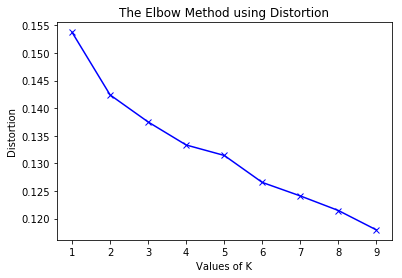

In [84]:
K = range(1,10) # iterating k from 1 to 10

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k) 
    kmeanModel.fit(df_grouped)     
    distortions.append(sum(np.min(cdist(df_grouped, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df_grouped.shape[0]) 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()
    
    

In [78]:
distortions

[0.15377693610688112,
 0.14241699042832423,
 0.1377872078184606,
 0.1332628086962025,
 0.1291254507915432,
 0.12688373558063024,
 0.12515030793018964,
 0.12224542497117141,
 0.11520101773130839]

**We see no significant decrease in distortion after k=6. Thus, we shall choose k=6 for our analysis.**

In [85]:
cluster=6

In [86]:
clus=KMeans(n_clusters=cluster, init='k-means++', n_init=15)

In [87]:
clus.fit(df_grouped)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [88]:
labels=clus.labels_

In [89]:
df_with_labels=df_grouped.reset_index()

In [90]:
df_with_labels.head()

,City,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Wine Bar,Wine Shop,Winery,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit
0,AMSTERDAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.01,0.00,0.0,0.02,0.00,0.01,0.0
1,ATHENS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
2,BANGKOK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
3,BARCELONA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.00,0.00,0.0,0.01,0.00,0.00,0.0
4,BEIJING,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.01,0.0,0.00,0.03,0.00,0.0


In [91]:
df_with_labels.insert(0,'Cluster',value=labels)

In [92]:
df_with_labels.head()

,Cluster,City,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Wine Bar,Wine Shop,Winery,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit
0,3,AMSTERDAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.01,0.00,0.0,0.02,0.00,0.01,0.0
1,1,ATHENS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
2,2,BANGKOK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
3,4,BARCELONA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.00,0.00,0.0,0.01,0.00,0.00,0.0
4,2,BEIJING,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.00,0.01,0.0,0.00,0.03,0.00,0.0


In [93]:
df_with_labels.shape

(50, 392)

#### Getting Latitudes and Longitudes 

In [94]:
df_with_labels_latlon=pd.merge(df_with_labels,top_50_df,left_on='City',right_on='City_name',how='left')

In [95]:
df_with_labels_latlon.head()

,Cluster,City,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit,City_name,Latitude,Longitude
0,3,AMSTERDAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.00,0.0,0.02,0.00,0.01,0.0,AMSTERDAM,52.372760,4.893604
1,1,ATHENS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,ATHENS,37.983941,23.728305
2,2,BANGKOK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.0,BANGKOK,13.754253,100.493087
3,4,BARCELONA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.01,0.00,0.00,0.0,BARCELONA,41.382894,2.177432
4,2,BEIJING,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.01,0.0,0.00,0.03,0.00,0.0,BEIJING,39.906217,116.391276


In [96]:
df_with_labels_latlon.shape

(50, 395)

In [97]:
df_with_labels_latlon.drop(['City_name'],axis=1)

,Cluster,City,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Winery,Women's Store,Xinjiang Restaurant,Yakitori Restaurant,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit,Latitude,Longitude
0,3,AMSTERDAM,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.01,0.00,0.00,0.02,0.00,0.010000,0.00,52.372760,4.893604
1,1,ATHENS,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,37.983941,23.728305
2,2,BANGKOK,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,13.754253,100.493087
3,4,BARCELONA,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.000000,0.00,41.382894,2.177432
4,2,BEIJING,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.01,0.00,0.00,0.03,0.000000,0.00,39.906217,116.391276
5,1,BERGEN,0.00,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,60.394306,5.325919
6,0,BERLIN,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,52.517037,13.388860
7,1,BRUGES,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,51.208553,3.226772
8,3,BUDAPEST,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.000000,0.00,47.498382,19.040471
9,4,BUENOS-AIRES,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,-34.607568,-58.437089


In [104]:
#!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [105]:
import folium

In [106]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [107]:
# create map
map_clusters = folium.Map(location=[0, 0], zoom_start=1.5)

# set color scheme for the clusters
x = np.arange(cluster)
ys = [i + x + (i*x)**2 for i in range(cluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(df_with_labels_latlon['Latitude'],df_with_labels_latlon['Longitude'], df_with_labels_latlon['Cluster']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [108]:
map_clusters

#### The following function creates the dataframe with nth most common venues

In [109]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [110]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Cluster','City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cluster_features = pd.DataFrame(columns=columns)
cluster_features['Cluster'] = df_with_labels['Cluster']
cluster_features['City'] = df_with_labels['City']


for ind in np.arange(df_with_labels.shape[0]):
    cluster_features.iloc[ind, 2:] = return_most_common_venues(df_with_labels.iloc[ind, :], num_top_venues)

cluster_features

,Cluster,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,AMSTERDAM,Hotel,Coffee Shop,Cocktail Bar,Breakfast Spot,Bookstore,Plaza,Canal,Café,Bar,Bakery
1,1,ATHENS,Café,Coffee Shop,Bar,Historic Site,Meze Restaurant,Theater,Greek Restaurant,Cocktail Bar,Boutique,Bookstore
2,2,BANGKOK,Hotel,Coffee Shop,Shopping Mall,Park,Thai Restaurant,Noodle House,Spa,Bookstore,Clothing Store,Asian Restaurant
3,4,BARCELONA,Hotel,Coffee Shop,Plaza,Tapas Restaurant,Burger Joint,Pizza Place,Breakfast Spot,Ice Cream Shop,Argentinian Restaurant,Park
4,2,BEIJING,Historic Site,Hotel,Park,Café,Shopping Mall,Brewery,Chinese Restaurant,Dumpling Restaurant,Pizza Place,Yunnan Restaurant
5,1,BERGEN,Hotel,Bar,Coffee Shop,Café,Mountain,Restaurant,Bakery,Shopping Mall,Furniture / Home Store,Seafood Restaurant
6,0,BERLIN,Coffee Shop,Bookstore,Park,Ice Cream Shop,Gourmet Shop,Café,Hotel,Monument / Landmark,Bakery,Wine Bar
7,1,BRUGES,Belgian Restaurant,Bar,Bakery,French Restaurant,Hotel,Bistro,Clothing Store,Sports Club,Pub,Tapas Restaurant
8,3,BUDAPEST,Coffee Shop,Bakery,Hotel,Ice Cream Shop,Park,Indie Movie Theater,Italian Restaurant,Dessert Shop,Cocktail Bar,Greek Restaurant
9,4,BUENOS-AIRES,Ice Cream Shop,Hotel,Bakery,Plaza,Pizza Place,BBQ Joint,Middle Eastern Restaurant,Restaurant,Bookstore,Café


In [111]:
cluster_features.head()

,Cluster,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,AMSTERDAM,Hotel,Coffee Shop,Cocktail Bar,Breakfast Spot,Bookstore,Plaza,Canal,Café,Bar,Bakery
1,1,ATHENS,Café,Coffee Shop,Bar,Historic Site,Meze Restaurant,Theater,Greek Restaurant,Cocktail Bar,Boutique,Bookstore
2,2,BANGKOK,Hotel,Coffee Shop,Shopping Mall,Park,Thai Restaurant,Noodle House,Spa,Bookstore,Clothing Store,Asian Restaurant
3,4,BARCELONA,Hotel,Coffee Shop,Plaza,Tapas Restaurant,Burger Joint,Pizza Place,Breakfast Spot,Ice Cream Shop,Argentinian Restaurant,Park
4,2,BEIJING,Historic Site,Hotel,Park,Café,Shopping Mall,Brewery,Chinese Restaurant,Dumpling Restaurant,Pizza Place,Yunnan Restaurant


#### The clustering exercise marks the end of our Analysis Phase. Next we shall move on to the Results & Discussions section. 

### Results & Discussion <a name="results"></a>

#### By now, we have clustered the cities ensuring that the clustering exercise produces the most optimum number of clusters into which the cities will be grouped.  Next, we shall filter for each cluster number and try to find out the Top 3 venues that define the cluster's uniqueness.

#### While it is fully understandable that each city may have a different most common venue, we will try to label the clusters basis the top 3 venues for each cluster and for its underlying cities.



#### Cities in Cluster 0 are:

In [114]:
cluster_0=cluster_features[cluster_features['Cluster']==0]

In [151]:
cluster_0

,Cluster,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,0,BERLIN,Coffee Shop,Bookstore,Park,Ice Cream Shop,Gourmet Shop,Café,Hotel,Monument / Landmark,Bakery,Wine Bar
12,0,CHICAGO,Park,Hotel,Theater,Grocery Store,Gym,Italian Restaurant,Liquor Store,Sandwich Place,Seafood Restaurant,Pizza Place
15,0,DUBLIN,Café,Park,Coffee Shop,Pub,Restaurant,Plaza,Ice Cream Shop,Bookstore,Food & Drink Shop,Beach
17,0,EDINBURGH,Café,Park,Coffee Shop,Hotel,Cocktail Bar,Beer Bar,Sandwich Place,French Restaurant,Gastropub,Scenic Lookout
25,0,LONDON,Park,Garden,Hotel,Ice Cream Shop,Grocery Store,Plaza,Bakery,Café,Coffee Shop,Art Gallery
28,0,NEW-YORK,Park,Bookstore,Ice Cream Shop,Gourmet Shop,Theater,Pier,Italian Restaurant,Movie Theater,Indie Movie Theater,Scenic Lookout
30,0,PRAGUE,Café,Park,Coffee Shop,Ice Cream Shop,Yoga Studio,Garden,Theater,Indie Movie Theater,Cocktail Bar,Scenic Lookout
31,0,QUEBEC-CITY,Park,Café,Grocery Store,Restaurant,Fast Food Restaurant,Ice Cream Shop,French Restaurant,Candy Store,Coffee Shop,Pizza Place
34,0,RIO-DE-JANEIRO,Coffee Shop,Beach,Scenic Lookout,Fruit & Vegetable Store,Park,Bar,Art Museum,Ice Cream Shop,Bookstore,Historic Site
36,0,SAN-DIEGO,Park,Brewery,Zoo Exhibit,Seafood Restaurant,Taco Place,Grocery Store,Hotel,Coffee Shop,Beach,Farmers Market


In [158]:
cluster_0.shape

(14, 12)

**Using the melt function to have all the venues in one column**

In [139]:
clus_0_melt=pd.melt(cluster_0, id_vars=['Cluster','City'], value_vars=cluster_0.columns[2:12], var_name='Common_venues', value_name='Venue_name')

In [157]:
clus_0_melt

,Cluster,City,Common_venues,Venue_name
0,0,BERLIN,1st Most Common Venue,Coffee Shop
1,0,CHICAGO,1st Most Common Venue,Park
2,0,DUBLIN,1st Most Common Venue,Café
3,0,EDINBURGH,1st Most Common Venue,Café
4,0,LONDON,1st Most Common Venue,Park
5,0,NEW-YORK,1st Most Common Venue,Park
6,0,PRAGUE,1st Most Common Venue,Café
7,0,QUEBEC-CITY,1st Most Common Venue,Park
8,0,RIO-DE-JANEIRO,1st Most Common Venue,Coffee Shop
9,0,SAN-DIEGO,1st Most Common Venue,Park


In [140]:
clus_0_unique_venues_count=clus_0_melt['Venue_name'].value_counts()

In [141]:
clus_0_unique_venues_count[0:3] # Taking the top 3 venues

Park              14
Coffee Shop       12
Ice Cream Shop    10
Name: Venue_name, dtype: int64

#### Number of cities in cluster 0 : 14
#### Number of Parks among the Top visited venue in the cluster : 14
#### Thus, we can clearly say that for any city belonging to cluster 0, Parks is definitely among Top 10 Most visited venue.

#### Cities in Cluster 1 are:

In [164]:
cluster_1=cluster_features[cluster_features['Cluster']==1]

In [165]:
cluster_1

,Cluster,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,1,ATHENS,Café,Coffee Shop,Bar,Historic Site,Meze Restaurant,Theater,Greek Restaurant,Cocktail Bar,Boutique,Bookstore
5,1,BERGEN,Hotel,Bar,Coffee Shop,Café,Mountain,Restaurant,Bakery,Shopping Mall,Furniture / Home Store,Seafood Restaurant
7,1,BRUGES,Belgian Restaurant,Bar,Bakery,French Restaurant,Hotel,Bistro,Clothing Store,Sports Club,Pub,Tapas Restaurant
39,1,SAN-SEBASTIAN,Spanish Restaurant,Tapas Restaurant,Restaurant,Bar,Seafood Restaurant,Beach,Hotel,Plaza,Scenic Lookout,Gastropub
49,1,ZURICH,Café,Swiss Restaurant,Hotel,Cocktail Bar,Bar,Vegetarian / Vegan Restaurant,Plaza,Japanese Restaurant,Park,Bakery


In [166]:
cluster_1.shape

(5, 12)

In [167]:
clus_1_melt=pd.melt(cluster_1, id_vars=['Cluster','City'], value_vars=cluster_1.columns[2:12], var_name='Common_venues', value_name='Venue_name')

In [168]:
clus_1_unique_venues_count=clus_1_melt['Venue_name'].value_counts()

In [169]:
clus_1_unique_venues_count[0:3]

Bar       5
Hotel     4
Bakery    3
Name: Venue_name, dtype: int64

#### Number of cities in cluster 1 : 5
#### Number of Bars among the Top visited venue in the cluster : 5
#### Thus, we can clearly say that for any city belonging to cluster 1, Bars is definitely among Top 10 Most visited venue.

#### Cities in Cluster 2 are:

In [170]:
cluster_2=cluster_features[cluster_features['Cluster']==2]

In [171]:
cluster_2

,Cluster,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,2,BANGKOK,Hotel,Coffee Shop,Shopping Mall,Park,Thai Restaurant,Noodle House,Spa,Bookstore,Clothing Store,Asian Restaurant
4,2,BEIJING,Historic Site,Hotel,Park,Café,Shopping Mall,Brewery,Chinese Restaurant,Dumpling Restaurant,Pizza Place,Yunnan Restaurant
11,2,CARTAGENA,Hotel,Beach,Resort,Historic Site,Restaurant,Coffee Shop,Café,Italian Restaurant,Plaza,Bar
13,2,CUSCO,Hotel,Peruvian Restaurant,Plaza,Historic Site,Café,Hostel,BBQ Joint,Restaurant,Coffee Shop,Scenic Lookout
14,2,DUBAI,Hotel,Resort,Beach,Restaurant,Shopping Mall,Lounge,Café,Coffee Shop,Golf Course,Bakery
16,2,DUBROVNIK,Hotel,Mediterranean Restaurant,Historic Site,Restaurant,Beach,Pizza Place,Bar,Castle,Italian Restaurant,Resort
19,2,HAVANA,Cuban Restaurant,Hotel,Beach,Hotel Bar,Nightclub,Park,Airport Terminal,Cocktail Bar,Plaza,Restaurant
20,2,HONG-KONG,Hotel,Cocktail Bar,Japanese Restaurant,Café,Thai Restaurant,Bar,Yoga Studio,Gym / Fitness Center,Italian Restaurant,Chinese Restaurant
22,2,JAIPUR,Hotel,Indian Restaurant,Historic Site,Resort,Café,Tea Room,Hostel,Shopping Mall,Palace,Ice Cream Shop
23,2,JERUSALEM,Hotel,Café,Middle Eastern Restaurant,History Museum,Park,Historic Site,Mediterranean Restaurant,Mountain,Plaza,Restaurant


In [172]:
cluster_2.shape

(13, 12)

In [173]:
clus_2_melt=pd.melt(cluster_2, id_vars=['Cluster','City'], value_vars=cluster_2.columns[2:12], var_name='Common_venues', value_name='Venue_name')

In [174]:
clus_2_unique_venues_count=clus_2_melt['Venue_name'].value_counts()

In [175]:
clus_2_unique_venues_count[0:3]

Hotel         13
Café           8
Restaurant     8
Name: Venue_name, dtype: int64

#### Number of cities in cluster 0 : 13
#### Number of Hotels among the Top visited venue in the cluster : 13
#### Thus, we can clearly say that for any city belonging to cluster 2, Hotels is definitely among Top 10 Most visited venue.

#### Cities in Cluster 3 are:

In [176]:
cluster_3=cluster_features[cluster_features['Cluster']==3]

In [177]:
cluster_3

,Cluster,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,AMSTERDAM,Hotel,Coffee Shop,Cocktail Bar,Breakfast Spot,Bookstore,Plaza,Canal,Café,Bar,Bakery
8,3,BUDAPEST,Coffee Shop,Bakery,Hotel,Ice Cream Shop,Park,Indie Movie Theater,Italian Restaurant,Dessert Shop,Cocktail Bar,Greek Restaurant
10,3,CAPE-TOWN,Hotel,Coffee Shop,Café,Deli / Bodega,Scenic Lookout,Beach,Trail,Sushi Restaurant,Theater,Grocery Store
18,3,HANOI,Coffee Shop,Hotel,Vietnamese Restaurant,Noodle House,BBQ Joint,Pizza Place,Brewery,Park,Golf Course,Mexican Restaurant
21,3,ISTANBUL,Mosque,Hotel,Historic Site,History Museum,Soccer Stadium,Coffee Shop,Sporting Goods Shop,Café,Park,Theater
33,3,QUITO,Bakery,Italian Restaurant,Burger Joint,Ice Cream Shop,Supermarket,Coffee Shop,Park,Hotel,Church,Shopping Mall
40,3,SEOUL,Park,Coffee Shop,BBQ Joint,Hotel,Korean Restaurant,Bakery,Historic Site,Palace,Mountain,Fried Chicken Joint
42,3,ST-PETERSBURG,Coffee Shop,Park,Theater,Plaza,Art Museum,Hotel,Waterfront,Spa,Bakery,Gastropub
44,3,TOKYO,BBQ Joint,Art Museum,Garden,Hotel,Ramen Restaurant,Tonkatsu Restaurant,Wagashi Place,Coffee Shop,Italian Restaurant,History Museum


In [178]:
cluster_3.shape

(9, 12)

In [179]:
clus_3_melt=pd.melt(cluster_3, id_vars=['Cluster','City'], value_vars=cluster_3.columns[2:12], var_name='Common_venues', value_name='Venue_name')

In [180]:
clus_3_unique_venues_count=clus_3_melt['Venue_name'].value_counts()

In [181]:
clus_3_unique_venues_count[0:3]

Coffee Shop    9
Hotel          9
Park           6
Name: Venue_name, dtype: int64

#### Number of cities in cluster 3 : 9
#### Number of Coffee Shops among the Top visited venue in the cluster : 9
#### Thus, we can clearly say that for any city belonging to cluster 3, Coffee Shops is definitely among Top 10 Most visited venue.

#### Cities in Cluster 4 are:

In [182]:
cluster_4=cluster_features[cluster_features['Cluster']==4]

In [183]:
cluster_4

,Cluster,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,4,BARCELONA,Hotel,Coffee Shop,Plaza,Tapas Restaurant,Burger Joint,Pizza Place,Breakfast Spot,Ice Cream Shop,Argentinian Restaurant,Park
9,4,BUENOS-AIRES,Ice Cream Shop,Hotel,Bakery,Plaza,Pizza Place,BBQ Joint,Middle Eastern Restaurant,Restaurant,Bookstore,Café
24,4,LISBON,Plaza,Scenic Lookout,Garden,Ice Cream Shop,Café,Portuguese Restaurant,Restaurant,Coffee Shop,Breakfast Spot,Hotel
26,4,MADRID,Park,Plaza,Spanish Restaurant,Coffee Shop,Restaurant,Art Museum,Ice Cream Shop,Garden,Japanese Restaurant,Monument / Landmark
29,4,PARIS,Plaza,Hotel,Park,Art Museum,Garden,Coffee Shop,Bookstore,Bakery,Historic Site,Ice Cream Shop
35,4,ROME,Plaza,Ice Cream Shop,Italian Restaurant,Church,Park,Historic Site,Art Museum,Sandwich Place,Fountain,Garden
47,4,VENICE,Italian Restaurant,Plaza,Hotel,Pizza Place,Cocktail Bar,Park,Church,Café,Scenic Lookout,Public Art
48,4,VIENNA,Plaza,Hotel,Austrian Restaurant,Ice Cream Shop,Park,Café,Art Museum,Japanese Restaurant,Pizza Place,Bar


In [184]:
cluster_4.shape

(8, 12)

In [185]:
clus_4_melt=pd.melt(cluster_4, id_vars=['Cluster','City'], value_vars=cluster_4.columns[2:12], var_name='Common_venues', value_name='Venue_name')

In [186]:
clus_4_unique_venues_count=clus_4_melt['Venue_name'].value_counts()

In [187]:
clus_4_unique_venues_count[0:3]

Plaza             8
Ice Cream Shop    7
Park              6
Name: Venue_name, dtype: int64

#### Number of cities in cluster 4 : 8
#### Number of Plazas among the Top visited venue in the cluster : 8
#### Thus, we can clearly say that for any city belonging to cluster 4, Plazas is definitely among Top 10 Most visited venue.

#### Cities in Cluster 5 are:

In [188]:
cluster_5=cluster_features[cluster_features['Cluster']==5]

In [189]:
cluster_5

,Cluster,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,5,MARRAKESH,Hotel,Moroccan Restaurant,Resort,French Restaurant,Lounge,Museum,Nightclub,Burger Joint,Bed & Breakfast,Café


In [190]:
cluster_5.shape

(1, 12)

In [191]:
clus_5_melt=pd.melt(cluster_5, id_vars=['Cluster','City'], value_vars=cluster_5.columns[2:12], var_name='Common_venues', value_name='Venue_name')

In [192]:
clus_5_unique_venues_count=clus_5_melt['Venue_name'].value_counts()

In [193]:
clus_5_unique_venues_count[0:3]

Bed & Breakfast        1
Lounge                 1
Moroccan Restaurant    1
Name: Venue_name, dtype: int64

#### Number of cities in cluster 5 : 1
#### Number of Bed & Breakfast venues among the Top visited venue in the cluster : 1
#### Thus, we can clearly say that for any city belonging to cluster 5, Bed & Breakfast venues is definitely among Top 10 Most visited venue.

#### Here, we obtain the result of the project in the below dataframe

### Summarizing our results in a table called **"Travel_Handbook"** with cluster numbers replaced by appropriate Speciality_Hangouts for the cluster

In [194]:
Travel_Handbook=cluster_features[['City','Cluster']]

In [195]:
Travel_Handbook

,City,Cluster
0,AMSTERDAM,3
1,ATHENS,1
2,BANGKOK,2
3,BARCELONA,4
4,BEIJING,2
5,BERGEN,1
6,BERLIN,0
7,BRUGES,1
8,BUDAPEST,3
9,BUENOS-AIRES,4


In [196]:
Travel_Handbook=Travel_Handbook.replace({0:'Parks',1:'Bars',2:'Hotels',3:'Coffee Shops',4:'Plazas',5:'Bed & Breakfast'})

In [200]:
Travel_Handbook=Travel_Handbook.rename(columns={'Cluster':'Speciality_Hangouts'})

In [201]:
Travel_Handbook

,City,Speciality_Hangouts
0,AMSTERDAM,Coffee Shops
1,ATHENS,Bars
2,BANGKOK,Hotels
3,BARCELONA,Plazas
4,BEIJING,Hotels
5,BERGEN,Bars
6,BERLIN,Parks
7,BRUGES,Bars
8,BUDAPEST,Coffee Shops
9,BUENOS-AIRES,Plazas


## We are ready with our Travel Handbook!!!:)

### Conclusion <a name="conclusion"></a>

Purpose of this project was to identify similar cities among top 50 most beautiful cities globally in terms of venues in their vicinity. This was primarily done in order to understand the cities better in terms of their lifestyle and choices. The objective behind this project was to help travel enthusiasts in planning and make intelligent decisions while travelling/ recommending travel itenaries . This is equally useful for online portals/ travel magazines. 

We have obtained six major cluster of cities characterized by **Parks, Bars, Hotels, Coffee Shops, Plazas and Bed & Breakfast**. All clusters barring **Bed & Breakfast** have multiple cities in them. 

The city of Marrakesh seems to be quite interesting as it did not share similarities with the remaining 49 cities. **Something to really check out!!**

Also, **cluster label/ Speciality_Hangouts, thus obtained after the analysis, clearly implies that the particular speciality will be present in at least the top 10 most visited place in any city of that particular cluster.**

While this analysis tries to present a holistic view of the top 50 cities, final decision to consider one's travel plans will be strictly one's own decision and this may depend on several other factors and preferences.
